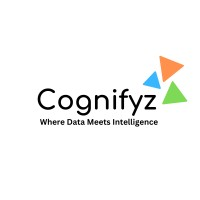

# LEVEL 1

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#import geopandas as gpd
#import folium



# Task 1

 # Task: Data Exploration and Preprocessing

In [8]:
df = pd.read_csv("Dataset .csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# Explore the dataset and identify the number of rows and columns.


In [7]:
rows, columns = df.shape
missing_values = df.isnull().sum()
data_types = df.dtypes

rows, columns, missing_values, data_types

(9551,
 21,
 Restaurant ID           0
 Restaurant Name         0
 Country Code            0
 City                    0
 Address                 0
 Locality                0
 Locality Verbose        0
 Longitude               0
 Latitude                0
 Cuisines                9
 Average Cost for two    0
 Currency                0
 Has Table booking       0
 Has Online delivery     0
 Is delivering now       0
 Switch to order menu    0
 Price range             0
 Aggregate rating        0
 Rating color            0
 Rating text             0
 Votes                   0
 dtype: int64,
 Restaurant ID             int64
 Restaurant Name          object
 Country Code              int64
 City                     object
 Address                  object
 Locality                 object
 Locality Verbose         object
 Longitude               float64
 Latitude                float64
 Cuisines                 object
 Average Cost for two      int64
 Currency                 object
 Has Table

# Check for missing values in each column and handle them accordingly


In [44]:
#Check for missing values in each column and handle them accordingly

missing_values = df.isnull().sum()
print(missing_values)

#Handle the missing values
for col in df.columns:
    if df[col].dtype == 'object': #categorical column
        df[col].fillna(df[col].mode()[0], inplace=True)
    elif df[col].dtype in ['int64','float64']: #numerical column
        df[col].fillna(df[col].mean(), inplace=True)


missing_values_after = df.isnull().sum()
missing_values_after

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


C:\Users\deepa\AppData\Local\Temp\ipykernel_4504\2864152791.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
C:\Users\deepa\AppData\Local\Temp\ipykernel_4504\2864152791.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

 # Analyze the distribution of the target variable("Aggregate rating") and identify any class imbalances


C:\Users\deepa\AppData\Local\Temp\ipykernel_4504\1668300104.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')


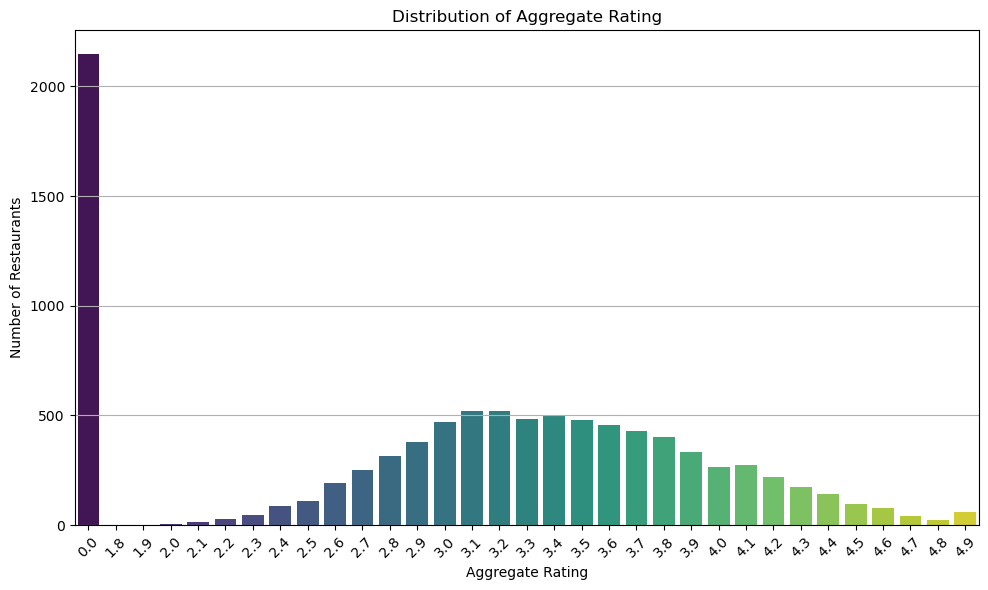

Aggregate rating
0.0    2148
1.8       1
1.9       2
2.0       7
2.1      15
2.2      27
2.3      47
2.4      87
2.5     110
2.6     191
2.7     250
2.8     315
2.9     381
3.0     468
3.1     519
3.2     522
3.3     483
3.4     498
3.5     480
3.6     458
3.7     427
3.8     400
3.9     335
4.0     266
4.1     274
4.2     221
4.3     174
4.4     144
4.5      95
4.6      78
4.7      42
4.8      25
4.9      61
Name: count, dtype: int64

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze distribution of 'Aggregate rating'
rating_counts = df['Aggregate rating'].value_counts().sort_index()

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')
plt.title('Distribution of Aggregate Rating')
plt.xlabel('Aggregate Rating')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Show value counts for detailed reference
rating_counts
# I also Check for extreme imbalances

# Task 2

# Descriptive Analysis

# I calculate basic stastical measure (mean, median, standard deviatiion, etc. for numerical columns.

In [26]:
# calculate basic stastical measure (mean, median, standard deviatiion, etc. for numerical columns.
columns_to_analyze =['Average Cost for two','Price range','Aggregate rating', 'Votes']

for col in columns_to_analyze:
    if col in df.columns:
        print(f"\nStatistics for {col}:")
        print(df[col].describe())
        print("Median:",df[col].median())
    else:
        print(f"Column '{col}' not found in the DataFrame.")


Statistics for Average Cost for two:
count      9551.000000
mean       1199.210763
std       16121.183073
min           0.000000
25%         250.000000
50%         400.000000
75%         700.000000
max      800000.000000
Name: Average Cost for two, dtype: float64
Median: 400.0

Statistics for Price range:
count    9551.000000
mean        1.804837
std         0.905609
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: Price range, dtype: float64
Median: 2.0

Statistics for Aggregate rating:
count    9551.000000
mean        2.666370
std         1.516378
min         0.000000
25%         2.500000
50%         3.200000
75%         3.700000
max         4.900000
Name: Aggregate rating, dtype: float64
Median: 3.2

Statistics for Votes:
count     9551.000000
mean       156.909748
std        430.169145
min          0.000000
25%          5.000000
50%         31.000000
75%        131.000000
max      10934.000000
Name: Votes, dtype: float6

# Exploring distribution of categorical variables


In [45]:
# Exploring distribution of categorical variables

print(Country_distribution:= df['Country Code'].value_counts())
print(City_distribution:= df['City'].value_counts())
print(Cuisine_distribution:= df['Cuisines'].value_counts())

# #identify the top  10 cuisines
# top_cuisines =df['Cuisines'].value_count().head(10)
# print("\nTop 10 cuisines:\n",top_cuisines)
# #Identify the top 10 Cities
# top_cities = df['City'].value_counts().head(10)
# print("\nTop 10 cities:\n", top_cities)
top_cuisines = cuisine_distribution.head(10)
top_cities = city_distribution.head(10)
Country_distribution, City_distribution, Cuisine_distribution, top_cuisines, top_cities

Country Code
1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: count, dtype: int64
City
New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: count, Length: 141, dtype: int64
Cuisines
North Indian                                             945
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, 

(Country Code
 1      8652
 216     434
 215      80
 30       60
 214      60
 189      60
 148      40
 208      34
 14       24
 162      22
 94       21
 184      20
 166      20
 191      20
 37        4
 Name: count, dtype: int64,
 City
 New Delhi           5473
 Gurgaon             1118
 Noida               1080
 Faridabad            251
 Ghaziabad             25
                     ... 
 Panchkula              1
 Mc Millan              1
 Mayfield               1
 Macedon                1
 Vineland Station       1
 Name: count, Length: 141, dtype: int64,
 Cuisines
 North Indian                                             945
 North Indian, Chinese                                    511
 Chinese                                                  354
 Fast Food                                                354
 North Indian, Mughlai                                    334
                                                         ... 
 Bengali, Fast Food                             

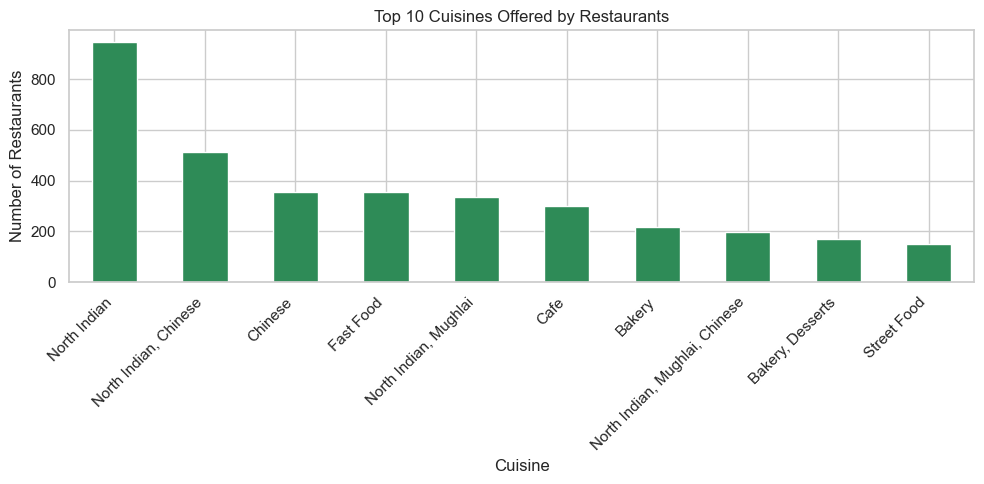

In [47]:
sns.set(style="whitegrid")
#visualize the TOP 10 cuisines
plt.figure(figsize=(10, 5))
top_cuisines.plot(kind='bar', color='seagreen')
plt.title('Top 10 Cuisines Offered by Restaurants')
plt.xlabel('Cuisine')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

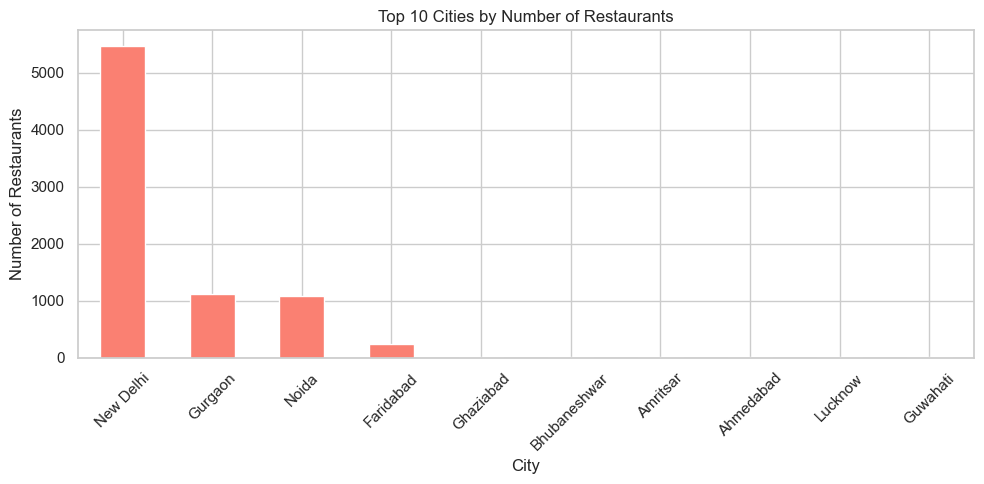

In [49]:
#Visualize the TOP 10 Cities By restaurant
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
top_cities.plot(kind='bar', color='salmon')
plt.title('Top 10 Cities by Number of Restaurants')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# Task 3

# Task: Geospatial Analysis

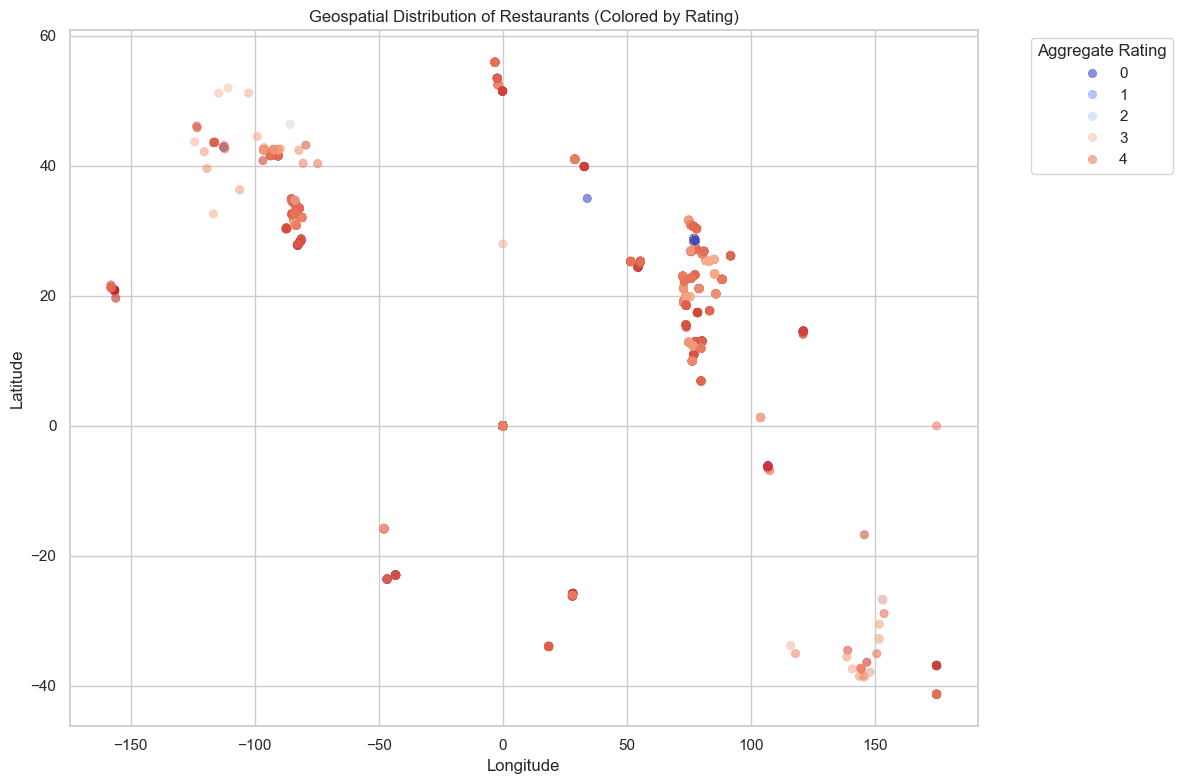

In [51]:
# Visualize the locations of restaurants on a map using latitude and longitude information.

import matplotlib.pyplot as plt
import seaborn as sns

# Visualize locations of restaurants using Latitude and Longitude
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='Aggregate rating', palette='coolwarm', alpha=0.6, edgecolor=None)
plt.title('Geospatial Distribution of Restaurants (Colored by Rating)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Aggregate Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



C:\Users\deepa\AppData\Local\Temp\ipykernel_4504\2464637739.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.values, y=city_counts.index, palette='Blues_d')


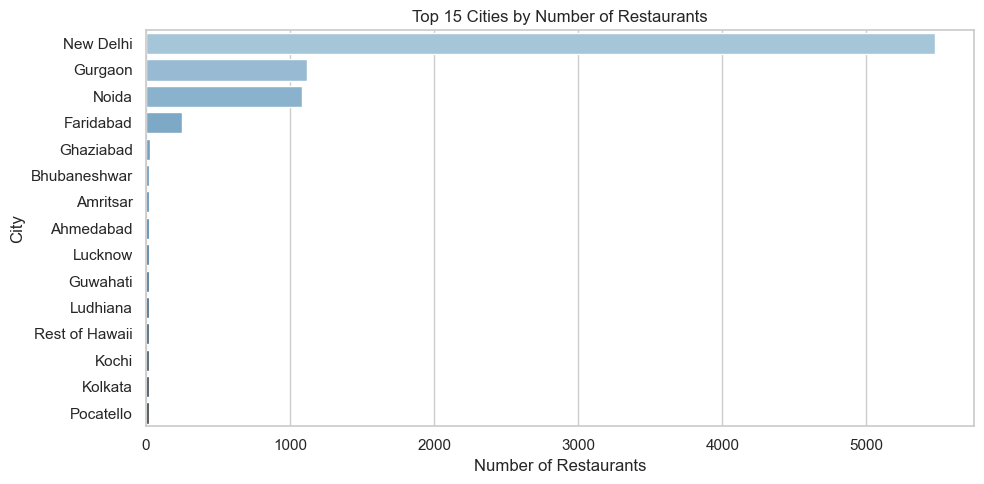

C:\Users\deepa\AppData\Local\Temp\ipykernel_4504\2464637739.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, palette='Purples_d')


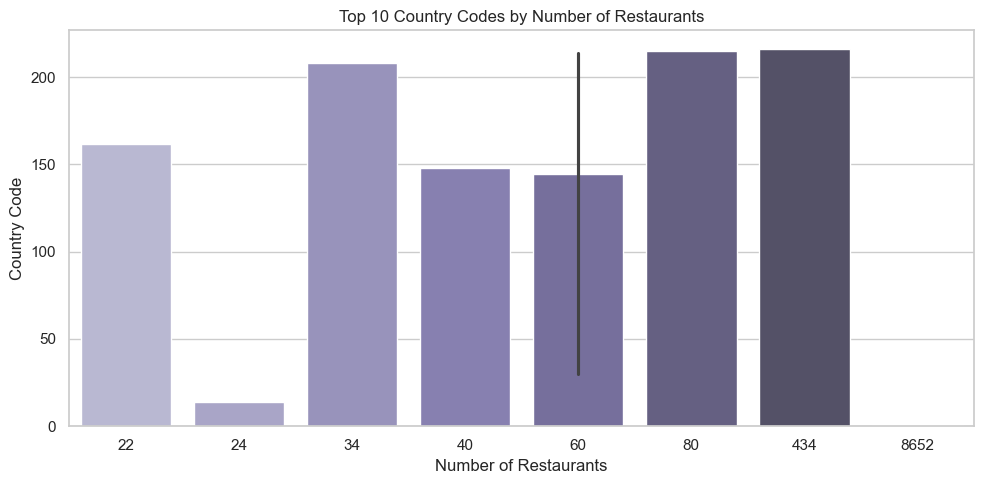

In [52]:
# Analyze the distribution of restaurants across different cities or countries.

city_counts = df['City'].value_counts().head(15)
country_counts = df['Country Code'].value_counts().head(10)

# Plot: Top Cities
plt.figure(figsize=(10, 5))
sns.barplot(x=city_counts.values, y=city_counts.index, palette='Blues_d')
plt.title('Top 15 Cities by Number of Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
plt.tight_layout()
plt.show()

# Plot: Top Countries
plt.figure(figsize=(10, 5))
sns.barplot(x=country_counts.values, y=country_counts.index, palette='Purples_d')
plt.title('Top 10 Country Codes by Number of Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('Country Code')
plt.tight_layout()
plt.show()

